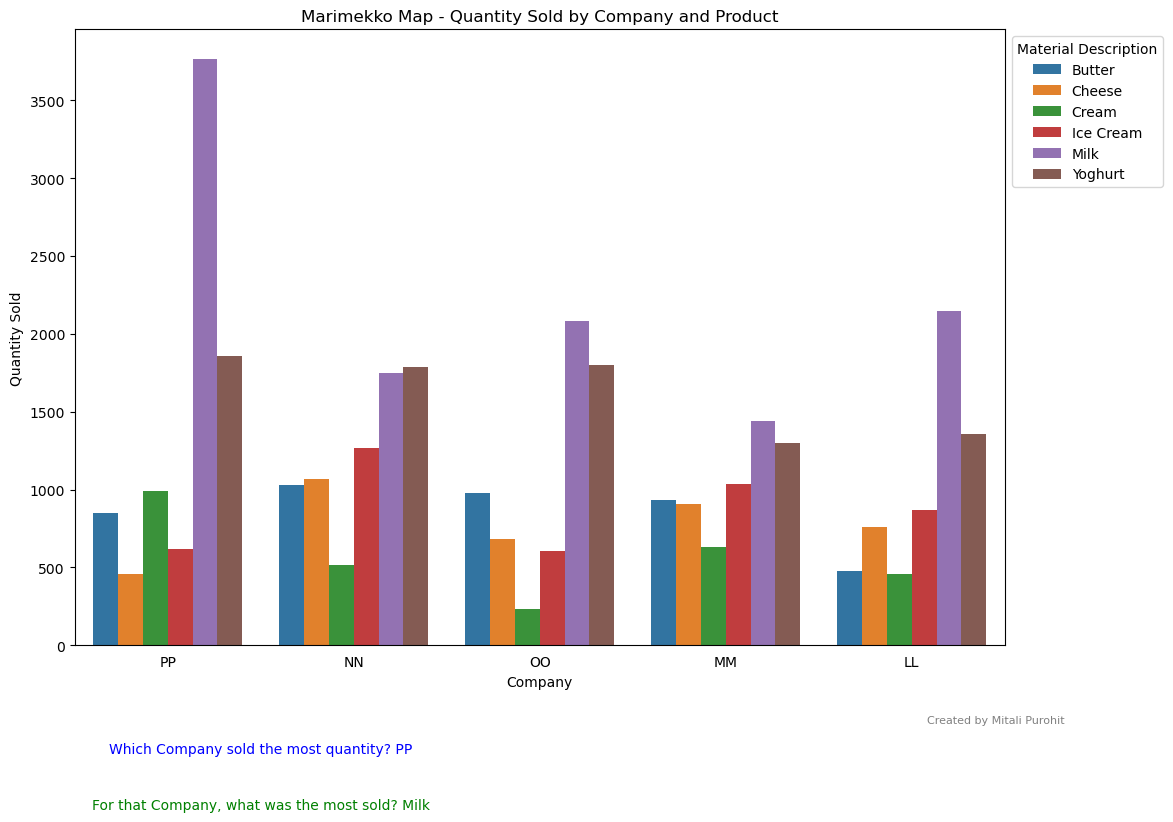

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "https://github.com/MitaliP001/game/raw/main/sfinal_csv.csv"
df = pd.read_csv(file_path)

# Group the data by 'SALES_ORGANIZATION' and calculate the total quantity sold for each company and product
company_product_quantity = df.groupby(['SALES_ORGANIZATION', 'MATERIAL_DESCRIPTION'])['QUANTITY'].sum().reset_index()

# Find the company that sold the most quantity overall
most_quantity_company = company_product_quantity.groupby('SALES_ORGANIZATION')['QUANTITY'].sum().idxmax()

# Find the overall most sold product
most_sold_product_overall = company_product_quantity.loc[company_product_quantity['QUANTITY'].idxmax()]['MATERIAL_DESCRIPTION']

# Sort the companies by total quantity sold
sorted_companies = company_product_quantity.groupby('SALES_ORGANIZATION')['QUANTITY'].sum().sort_values(ascending=False).index

# Create a Marimekko map with switched x and y axes
plt.figure(figsize=(12, 8))
sns.barplot(x='SALES_ORGANIZATION', y='QUANTITY', data=company_product_quantity, hue='MATERIAL_DESCRIPTION',
            palette='tab10', orient='v', dodge=True, order=sorted_companies)

# Annotate the company that sold the most quantity
plt.annotate(f"\n\nWhich Company sold the most quantity? {most_quantity_company}", 
             xy=(0.5, 0), xytext=(0, -80),
             textcoords='offset points', ha='center', va='bottom',
             fontsize=10, color='blue')

# Annotate the overall most sold product
plt.annotate(f"\nFor that Company, what was the most sold? {most_sold_product_overall}", 
             xy=(0.5, 0), xytext=(0, -120),
             textcoords='offset points', ha='center', va='bottom',
             fontsize=10, color='green')

plt.title('Marimekko Map - Quantity Sold by Company and Product')
plt.xlabel('Company')
plt.ylabel('Quantity Sold')
plt.legend(title='Material Description', bbox_to_anchor=(1, 1), loc='upper left')
plt.figtext(0.95, 0.01, 'Created by Mitali Purohit', horizontalalignment='right', verticalalignment='bottom', fontsize=8, color='gray')

# Move the company labels to the bottom and display horizontally
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelleft=False, left=False)

plt.show()
